<a href="https://colab.research.google.com/github/nagamamo/international_finance/blob/main/2_world_trade_an_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.1　世界貿易の概観

　「第2回世界貿易の概観と重力モデル」では、国際貿易統計を用いたデータの可視化と統計分析を行います。本例では、ライブラリwbgapiを用いて世界銀行データを取得し、分析します。

まず、パッケージをインストールします。

In [ ]:
pip install wbgapi

  　続いて、マクロ経済データの取得と分析に必要なライブラリをインポートします。今回使用するのはwbgapi、pandas_datareader、pandas、datetime、numpy、matplotlibの6種類です。

In [15]:
#[2]ライブラリの読み込み
import wbgapi as wb #世界銀行データ取得のためのライブラリ
import pandas_datareader as data #データ取得ライブラリ
import pandas as pd #データセット管理のためのライブラリ
import matplotlib.pyplot as plt #図表作成のためのライブラリ

　世界銀行データからマクロ経済統計を取得するためには、必要なデータのコードと国・地域コードが必要になります。まず、データコードの検索方法は次の通りです。例えば、経常収支(Current Account)を検索する場合、部分一致する何かしらの単語を入力すれば関連候補が検索されます。

In [ ]:
#[3]データコードの検索
display(wb.series.info(q='current account'))

次に、国・地域コードの検索方法は次の通りです。国・地域コードの場合は全コード一覧が表示されます

In [ ]:
"[4]国・地域コードの検索"
display(wb.economy.info())

　本節では、輸出、輸入データ（対GDP比）の取得手順を示します。本例では日本の輸出額、輸入額の例を示しますが、1行目を変更することで、世界190カ国いずれの国のデータの取得が可能です。

In [ ]:
#[7]輸出対GDP比(日本)データの取得
countries = ["JPN"]
indicators = {'NE.EXP.GNFS.ZS':'Exports of Goods and Services Japan'}
df=wb.data.DataFrame(indicators,countries, time=range(1970, 2023), skipBlanks=True, columns='series')
df.plot();
df.describe()

　続いて、日本の輸入額（対GDP比）のデータを可視化します。2010年代初頭以降、エネルギ―輸入額の増大により、輸入規模が上昇し続けていることが、近年の貿易サービス収支の悪化の一因となっています。

In [ ]:
countries = ["JPN"]
indicators = {'NE.IMP.GNFS.ZS':'Imports of Goods and Services Japan'}
df=wb.data.DataFrame(indicators,countries, time=range(1970, 2023), skipBlanks=True, columns='series')
df.plot();
df.describe()

2.2　重力モデル

　続いて教科書2章に基づき、重力モデルの可視化を分析を行います。「重力モデル」の理論的枠組みは、講義で説明した通りです。教科書ではEU加盟国と米国との貿易データを用いた図表が示されていますので、これをアジア太平洋地域に応用してみます。

　まず、分析に必要なライブラリをインポートします。今回使用するのはpandas、matplotlib他の4種類です。

In [1]:
#[1]ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt
import csv #データ読込みのためのライブラリのインポート
from google.colab import files

　続いて、アジア太平洋14カ国・地域の(1)輸出（輸入）額合計、(2)対米国輸出（輸入）額、(3)対中国輸出（輸入）額、(4)USドル建てGDP、の4種類のマクロ経済データを読み込みます。データは2022年のデータがgithubに格納されています。

※データ読込みがエラーする場合は、プルダウンメニューの「ランタイム」→「ランタイムを接続解除して削除」を選択してライブラリの読み込みからやり直してください。

In [ ]:
#[2]データ読込み
uploaded = files.upload() #データアップロードの指示
import io #データ形式指定のライブラリのインポート
df = pd.read_csv(io.BytesIO(uploaded['DOT_export.csv'])) #データ読込みの指示
df.head() #データ概要の表示

　上記のセルのデータ取得では、「国・地域名」がインデックス化されず、データとして読み込まれています。次のセルではこの「国・地域名」をインデックス化することで、可視化やデータ分析作業を効率化します。

In [ ]:
#[3]国・地域名のインデックス化
df = df.set_index("id")#国・地域をインデックスへ変更
df.head()

　続いて、このpandasデータフレームを用いて、新変数を算出、定義します。この作業はMS Excelで行う作業のイメージと同じです。

In [ ]:
#[4]新しい変数の算出
df['trade_GDP'] = df['WORLD']/df['GDP']
df['ratio']=df['CHINA']/df['USA']
df.head()

　最後に、横軸に「全貿易額の対GDP比」、縦軸に「米国向け輸出額（輸入額）／中国向け輸出額（輸入額）」の散布図を作成します。全世界向け輸出額（輸入額）に比べ、左上にマーカーがプロットされる国・地域は、中国との地理的距離が近く、貿易規模も大きい国・地域です。

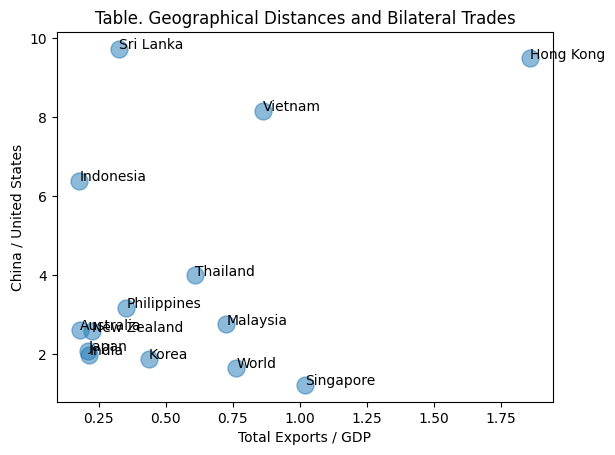

In [9]:
#[5]重力モデルの可視化
plt.scatter(df['trade_GDP'], df['ratio'],s=150, alpha=0.5)
plt.title("Table. Geographical Distances and Bilateral Trades")
plt.xlabel("Total Exports / GDP")
plt.ylabel("China / United States")
for i, txt in enumerate(df.index.values):
    plt.annotate(txt, (df['trade_GDP'].values[i], df['ratio'].values[i]))